In [2]:
import os
import json
import pdfplumber
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import string
import spacy
from spacy import displacy
from spacy.lang.en.examples import sentences 
import pickle
from lexicalrichness import LexicalRichness

%matplotlib inline

In [434]:
with open('data/gpt4_speakers_recipients_processed.json', 'r') as outfile:
    speakers = pd.read_json(outfile)

In [435]:
male_spoken_words = ' '.join(speakers[speakers.gender_recipient == 'M'].spoken_words_only)
female_spoken_words = ' '.join(speakers[speakers.gender_recipient == 'F'].spoken_words_only)
ngs_spoken_words = ' '.join(speakers[speakers.gender_recipient == 'NGS'].spoken_words_only)

# male_spoken_words = ' '.join(speakers[speakers.gender_speaker == 'M'].spoken_words_only)
# female_spoken_words = ' '.join(speakers[speakers.gender_speaker == 'F'].spoken_words_only)
# ngs_spoken_words = ' '.join(speakers[speakers.gender_speaker == 'NGS'].spoken_words_only)

In [437]:
len(female_spoken_words.split())

7020

In [438]:
speakers[speakers.gender_recipient == 'F'].spoken_words_only

62      Listen to me, Celery, If you act like a monste...
64      This isn’t funny, Celery! If you act like a mo...
66      Yuk! That smells disgusting, Celery! If you ac...
72                             Oh NO! I can’t stand THIS.
81                                   Not VERY well, dear.
                              ...                        
3850    It is more fun to share a book with a friend. ...
3852                                      I could do that
3853                      Mum, why can't I jump like you?
3876                Look, Mum! I can jump. Just like you!
3901                                        We’d love to!
Name: spoken_words_only, Length: 717, dtype: object

In [148]:
f_lex = LexicalRichness(female_spoken_words)
m_lex = LexicalRichness(male_spoken_words)
n_lex = LexicalRichness(ngs_spoken_words)

In [11]:
f_lex.terms

1330

In [12]:
m_lex.terms

1981

In [13]:
n_lex.terms

1493

In [15]:
print(
    f_lex.mtld(threshold=0.72),
    m_lex.mtld(threshold=0.72),
    n_lex.mtld(threshold=0.72)
)

57.56973800328276 66.65045824718376 43.94124016714517


In [16]:
print(
    f_lex.Herdan,
    m_lex.Herdan,
    n_lex.Herdan
)

0.7848239328067733 0.7624663738600715 0.7889611143371854


In [17]:
print(
    f_lex.Summer,
    m_lex.Summer,
    n_lex.Summer
)

0.8906308495698824 0.8819963376166602 0.893517746576197


In [18]:
print(
    f_lex.Maas,
    m_lex.Maas,
    n_lex.Maas
)

0.02347794684433221 0.023857579281099647 0.022781760880852146


In [20]:
print(
    f_lex.Dugast,
    m_lex.Dugast,
    n_lex.Dugast
)

42.59316228247654 41.91540089703132 43.89476323757267


In [26]:
print(
    f_lex.rttr,
    m_lex.rttr,
    n_lex.rttr
)

13.604758844635063 13.642616555605526 14.538376923347835


In [24]:
print(
    f_lex.hdd(draws=42),
    m_lex.hdd(draws=42),
    n_lex.hdd(draws=42)
)

0.8902730270122277 0.8913245911602806 0.8965731252193138


In [31]:
import random

In [54]:
rep = 10

In [195]:

def get_mean_ttr_sample(text, sample_size, rep=20):
    fttr  =[
        LexicalRichness(' '.join(random.sample(text.split(), sample_size))).terms#['terms']
        for i in range(rep)
    ]
    return np.mean(fttr)

In [181]:
ss = [10, 50, 100, 500, 1000, 5000, 6000, 7000]#, 8000, 9000]

In [182]:
a_mttr = [
    get_mean_ttr_sample(' '.join(speakers.spoken_words_only), s) for s in ss
]

In [196]:
f_mttr = [
    get_mean_ttr_sample(female_spoken_words, s) / len(speakers[speakers.gender_recipient=='F'].name_speaker.unique()) for si,s in enumerate(ss)
]
m_mttr = [
    get_mean_ttr_sample(male_spoken_words, s) / len(speakers[speakers.gender_recipient=='M'].name_speaker.unique()) for  si,s in enumerate(ss)
]
n_mttr = [
    get_mean_ttr_sample(ngs_spoken_words, s) / len(speakers[speakers.gender_recipient=='NGS'].name_speaker.unique()) for  si,s in enumerate(ss)
]


In [184]:
f_mttr = [
    get_mean_ttr_sample(female_spoken_words, s)/a_mttr[si] for si,s in enumerate(ss)
]
m_mttr = [
    get_mean_ttr_sample(male_spoken_words, s)/a_mttr[si] for  si,s in enumerate(ss)
]
n_mttr = [
    get_mean_ttr_sample(ngs_spoken_words, s)/a_mttr[si] for  si,s in enumerate(ss)
]


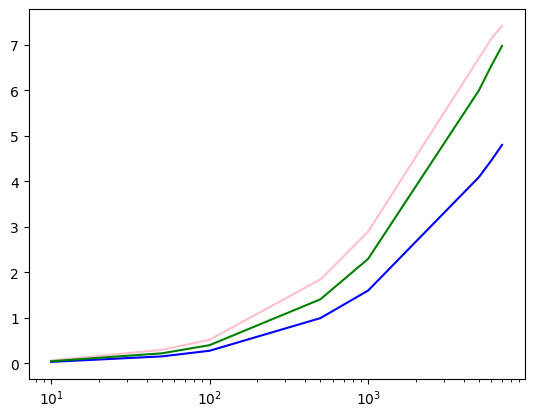

In [197]:
plt.plot(ss, f_mttr, c='pink')
plt.plot(ss, m_mttr, c='b')
plt.plot(ss, n_mttr, c='g')
# plt.yscale('log')
plt.xscale('log')

In [84]:
len(male_spoken_words.split())

21144

In [156]:
len(female_spoken_words.split())

7020

In [152]:
len(ngs_spoken_words)

73222

In [155]:
len(male_spoken_words)

105327

In [189]:
len(speakers[speakers.gender_speaker=='F'].name_speaker.unique())

113

In [190]:
len(speakers[speakers.gender_speaker=='M'].name_speaker.unique())

188

In [191]:
len(speakers[speakers.gender_speaker=='NGS'].name_speaker.unique())

155

In [192]:
len(speakers[speakers.gender_recipient=='F'].name_speaker.unique())

149

In [193]:
len(speakers[speakers.gender_recipient=='M'].name_speaker.unique())

283

In [194]:
len(speakers[speakers.gender_recipient=='NGS'].name_speaker.unique())

200

# By character:

In [235]:
fcr = [
    LexicalRichness(text).ttr
    for text in speakers[speakers.gender_recipient=='F'].spoken_words_only
]
fwc = [
    len(text.split())
    for text in speakers[speakers.gender_recipient=='F'].spoken_words_only
]

In [236]:
mcr = [
    LexicalRichness(text).ttr
    for text in speakers[speakers.gender_speaker=='NGS'].spoken_words_only
#     if len(text) > 0 and not pd.isna(text)
]
mwc = [
    len(text.split())
    for text in speakers[speakers.gender_speaker=='M'].spoken_words_only
]

ValueError: x and y must be the same size

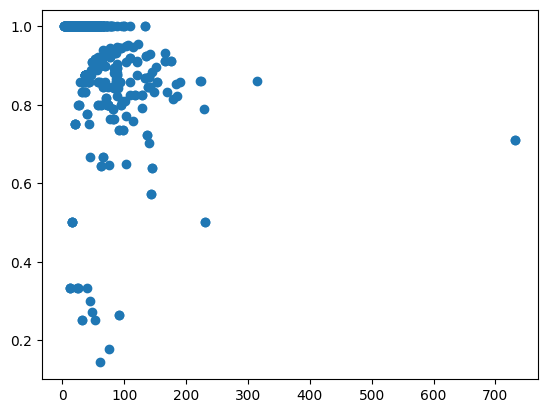

In [228]:
plt.scatter(fwc, fcr)
plt.scatter(mwc, mcr, c='g')
plt.xscale('log')

(array([0.08548162, 0.04026634, 0.01844603, 0.00877311, 0.00449903,
        0.00202456, 0.00112476, 0.        , 0.00022495, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0004499 ]),
 array([  1. ,   7.2,  13.4,  19.6,  25.8,  32. ,  38.2,  44.4,  50.6,
         56.8,  63. ,  69.2,  75.4,  81.6,  87.8,  94. , 100.2, 106.4,
        112.6, 118.8, 125. ]),
 <BarContainer object of 20 artists>)

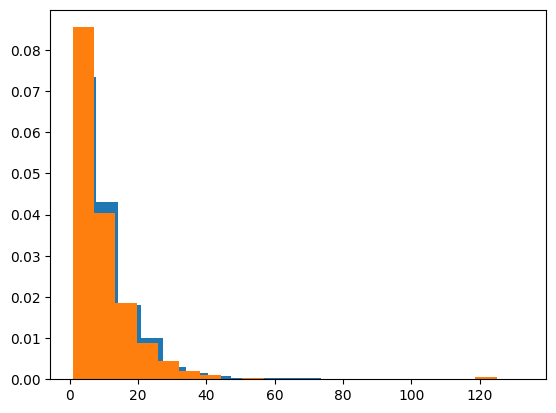

In [237]:


plt.hist(mwc, bins=20, density=True)
plt.hist(fwc, bins=20, density=True)

In [240]:
np.mean(mwc)

10.793261868300153

In [241]:
np.mean(fwc)

9.790794979079498

In [242]:
speakers

,book,speech_section_id,speaker,recipient,speaker_matched,recipient_matched,speech_text,spoken_words_only,spoken_word_count,chunk_titles,...,human_recipient,alias_count_recipient,speaker_is_mum,speaker_is_dad,speaker_is_granny,speaker_is_grandpa,recipient_is_mum,recipient_is_dad,recipient_is_granny,recipient_is_grandpa
0,The Night Before Christmas,0,St. Nicholas,Reindeer,St. Nicholas,Reindeer,"""Now, Dasher! now, Dancer!\nnow, Prancer and V...","Now, Dasher! now, Dancer! now, Prancer and Vix...",183,The Night Before Christmas,...,NH,0.0,False,False,False,False,False,False,False,False
1,The Night Before Christmas,1,St. Nicholas,Everyone,St. Nicholas,Everyone,"""Happy\nChristmas to all, and to all a good\nn...","Happy Christmas to all, and to all a good night!",48,The Night Before Christmas,...,H,0.0,False,False,False,False,False,False,False,False
2,Sugarlump and the Unicorn,0,Sugarlump,himself,Sugarlump,Sugarlump,"""Here in the children's bedroom\nIs where I wa...",Here in the children's bedroom Is where I want...,106,Sugarlump and the Unicorn,...,NH,0.0,False,False,False,False,False,False,False,False
3,Sugarlump and the Unicorn,1,Sugarlump,himself,Sugarlump,Sugarlump,"""Oh to be out in the big wide world!\nI wish I...",Oh to be out in the big wide world! I wish I c...,56,Sugarlump and the Unicorn,...,NH,0.0,False,False,False,False,False,False,False,False
4,Sugarlump and the Unicorn,2,unicorn,Sugarlump,unicorn,Sugarlump,"""Done!"" came a voice, and there stood a beast\...",Done! I can grant horses' wishes.,33,Sugarlump and the Unicorn,...,NH,0.0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,How The Grinch Stole Christmas,4,Grinch,Himself,Grinch,Grinch,All I need is a reindeer...,All I need is a reindeer...,27,How The Grinch Stole Christmas,...,NH,0.0,False,False,False,False,False,False,False,False
3909,How The Grinch Stole Christmas,5,Grinch,Himself,Grinch,Grinch,"If I can't find a reindeer, I'll make one inst...","If I can't find a reindeer, I'll make one inst...",50,How The Grinch Stole Christmas,...,NH,0.0,False,False,False,False,False,False,False,False
3910,How The Grinch Stole Christmas,6,Grinch,Max (the dog),Grinch,Max,Giddap!,Giddap!,7,How The Grinch Stole Christmas,...,NH,0.0,False,False,False,False,False,False,False,False
3911,How The Grinch Stole Christmas,7,Grinch,Himself,Grinch,Grinch,"This is stop number one, the old Grinchy Claus...",This is stop number one.,24,How The Grinch Stole Christmas,...,NH,0.0,False,False,False,False,False,False,False,False


In [243]:
speakers['spoken_word_count'] = [
    len(text.split()) for text in speakers.spoken_words_only
]

In [245]:
speakers[speakers.gender_recipient=='F'].spoken_word_count.mean()

9.790794979079498

In [246]:
speakers[speakers.gender_recipient=='M'].spoken_word_count.mean()

11.19590481460985

In [278]:
import sqlite3
conn = sqlite3.connect('character_database.db')

In [279]:
aliases = pd.read_sql('select * from aliases', conn, index_col='index')
characters = pd.read_sql('select * from characters', conn, index_col='index')

In [251]:
female_character_count = sum(characters.gender == 'F')
male_character_count = sum(characters.gender == 'M')
ngs_character_count = sum(characters.gender == 'NGS')

In [255]:
total_male_words = speakers[speakers.gender_recipient=='M'].spoken_word_count.sum()
total_female_words = speakers[speakers.gender_recipient=='F'].spoken_word_count.sum()
total_ngs_words = speakers[speakers.gender_recipient=='NGS'].spoken_word_count.sum()

In [256]:
total_female_words / (total_female_words+total_male_words+total_ngs_words)

0.1707239962061334

In [257]:
total_male_words / (total_female_words+total_male_words+total_ngs_words)

0.4920109924852258

In [258]:
total_ngs_words / (total_female_words+total_male_words+total_ngs_words)

0.3372650113086408

In [253]:
speakers[speakers.gender_recipient=='M'].spoken_word_count.sum() / male_character_count

38.17169811320755

In [254]:
speakers[speakers.gender_recipient=='F'].spoken_word_count.sum() / female_character_count

20.955223880597014

#### For interview:

In [468]:
conn = sqlite3.connect('character_database.db')

In [469]:
aliases = pd.read_sql('select * from aliases', conn, index_col='index')
characters = pd.read_sql('select * from characters', conn, index_col='index')

In [470]:
remove_non_stories = [
    'All Year Round', 'All About Feelings', 'Ten in the Bed and Other Counting Rhymes', 'Why Am I An Insect',
    'Farmer Duck'
]

In [471]:
characters = characters[~characters.book.isin(remove_non_stories)]

In [472]:
gender_count = {
    G: sum([1 for g in characters.gender if g==G])
    for G in ['F', 'M', 'NGS']
}

In [473]:
human_count = {
    G: sum([1 for g,h in zip(characters.gender, characters.human) if g==G and h=='H'])
    for G in ['F', 'M', 'NGS']
}

In [474]:
human_count

{'F': 197, 'M': 223, 'NGS': 59}

In [475]:
nonhuman_count = {
    G: sum([1 for g,h in zip(characters.gender, characters.human) if g==G and h=='NH'])
    for G in ['F', 'M', 'NGS']
}

In [476]:
nonhuman_count

{'F': 123, 'M': 271, 'NGS': 516}

In [477]:
protagonist_count = {
    G: sum([1 for g,h in zip(characters.gender, characters.is_protagonist) if g==G and h==1])
    for G in ['F', 'M', 'NGS']
}

In [487]:
protagonist_count

{'F': 44, 'M': 142, 'NGS': 21}

In [479]:
secondary_count = {
    G: sum([1 for g,h in zip(characters.gender, characters.is_protagonist) if g==G and h==0])
    for G in ['F', 'M', 'NGS']
}

In [480]:
secondary_count

{'F': 286, 'M': 388, 'NGS': 580}

In [481]:
secondary_count

{'F': 286, 'M': 388, 'NGS': 580}

In [477]:
protagonist_count = {
    G: sum([1 for g,h in zip(characters.gender, characters.is_protagonist) if g==G and h==1])
    for G in ['F', 'M', 'NGS']
}

In [478]:
protagonist_count

{'F': 44, 'M': 142, 'NGS': 21}

In [489]:
protagonist_human_count = {
    G: sum(
        [
            1 for g,p,h 
            in zip(characters.gender, characters.is_protagonist, characters.human) 
            if g==G and p==1 and h=='H']
    )
    for G in ['F', 'M', 'NGS']
}

In [490]:
protagonist_human_count

{'F': 23, 'M': 47, 'NGS': 8}

In [493]:
protagonist_nonhuman_count = {
    G: sum(
        [
            1 for g,p,h 
            in zip(characters.gender, characters.is_protagonist, characters.human) 
            if g==G and p==1 and h=='NH']
    )
    for G in ['F', 'M', 'NGS']
}

In [494]:
protagonist_nonhuman_count

{'F': 18, 'M': 71, 'NGS': 9}

In [545]:
secondary_human_count = {
    G: sum(
        [
            1 for g,p,h 
            in zip(characters.gender, characters.is_protagonist, characters.human) 
            if g==G and p==0 and h=='H']
    )
    for G in ['F', 'M', 'NGS']
}

In [546]:
secondary_human_count

{'F': 174, 'M': 176, 'NGS': 51}

In [547]:
secondary_nonhuman_count = {
    G: sum(
        [
            1 for g,p,h 
            in zip(characters.gender, characters.is_protagonist, characters.human) 
            if g==G and p==0 and h=='NH']
    )
    for G in ['F', 'M', 'NGS']
}

In [548]:
secondary_nonhuman_count

{'F': 105, 'M': 200, 'NGS': 507}

In [482]:
sum(gender_count.values())

1461

In [483]:
gender_count

{'F': 330, 'M': 530, 'NGS': 601}

In [549]:
summary_character = pd.DataFrame({
    'gender': gender_count.keys(),
    'total characters': gender_count.values(),
    'proportions': [v / len(characters) for v in gender_count.values()],
    'human characters': human_count.values(),
    'human proportions': [v / sum(characters.human=='H') for v in human_count.values()],
    'nonhuman characters': nonhuman_count.values(),
    'nonhuman proportions': [v / sum(characters.human=='NH') for v in nonhuman_count.values()],
    'protagonists': protagonist_count.values(),
    'protagonist proportions': [v / sum(characters.is_protagonist==1) for v in protagonist_count.values()],
    'secondaries': secondary_count.values(),
    'secondary proportions': [v / sum(characters.is_protagonist==0) for v in secondary_count.values()],
    'human protagonists': protagonist_human_count.values(),
    'human protagonist proportions': [v / sum((characters.is_protagonist==1)*(characters.human=='H')) for v in protagonist_human_count.values()],
    'nonhuman protagonists': protagonist_nonhuman_count.values(),
    'nonhuman protagonist proportions': [v / sum((characters.is_protagonist==1)*(characters.human=='NH')) for v in protagonist_nonhuman_count.values()],
    'human secondaries': secondary_human_count.values(),
    'human secondary proportions': [v / sum((characters.is_protagonist==0)*(characters.human=='H')) for v in secondary_human_count.values()],
    'nonhuman secondaries': secondary_nonhuman_count.values(),
    'nonhuman secondary proportions': [v / sum((characters.is_protagonist==0)*(characters.human=='NH')) for v in secondary_nonhuman_count.values()],
})

In [550]:
summary_character

,gender,total characters,proportions,human characters,human proportions,nonhuman characters,nonhuman proportions,protagonists,protagonist proportions,secondaries,secondary proportions,human protagonists,human protagonist proportions,nonhuman protagonists,nonhuman protagonist proportions,human secondaries,human secondary proportions,nonhuman secondaries,nonhuman secondary proportions
0,F,330,0.225873,197,0.411273,123,0.135165,44,0.212560,286,0.22807,23,0.294872,18,0.183673,174,0.433915,105,0.129310
1,M,530,0.362765,223,0.465553,271,0.297802,142,0.685990,388,0.30941,47,0.602564,71,0.724490,176,0.438903,200,0.246305
2,NGS,601,0.411362,59,0.123173,516,0.567033,21,0.101449,580,0.46252,8,0.102564,9,0.091837,51,0.127182,507,0.624384


In [551]:
gender_count['F'] / gender_count['M']

0.6226415094339622

In [395]:
mum_map = ['mum', 'mother', 'mummy', 'mom', 'mommy', 'ma', 'mama', 'mumma', 'mamma']
dad_map = ['dad', 'father', 'daddy', 'dada', 'dadda', 'da', 'pa', 'papa']
gran_map = ['gran', 'granny', 'nan', 'nana', 'nanna', 'grandma', 'gradmother', 'granmother'] 
grandpa_map = ['grandpa', 'gramps', 'grandfather', 'grandad', 'granddad']

def match_map(_map, _name, verbose=False):
    exclusions = ['christmas', 'xmas', 'nature', 'earth', 'time', 'clock']
    
    if not pd.isna(_name):
        _name = str(_name)
    else:
        _name=''
   
    is_exclusion = sum([
        m in _name.lower() for m in exclusions
    ]) > 0
    if is_exclusion:
        return False
    
    is_match = sum([
        m in _name.lower().split() for m in _map
    ]) > 0
    if is_match and verbose:
        print(_name)

    return is_match 

In [396]:
characters['is_mum'] = [
    match_map(mum_map, s)
    for s in characters.name
]
characters['is_dad'] = [
    match_map(dad_map, s)
    for s in characters.name
]
characters['is_granny'] = [
    match_map(gran_map, s)
    for s in characters.name
]
characters['is_grandpa'] = [
    match_map(grandpa_map, s)
    for s in characters.name
]

In [397]:
characters.is_mum.sum() / (characters.gender=='F').sum()

0.16363636363636364

In [398]:
characters.is_dad.sum() / (characters.gender=='M').sum()

0.05849056603773585

In [399]:
characters.is_granny.sum() / (characters.gender=='F').sum()

0.06363636363636363

In [400]:
characters.is_grandpa.sum() / (characters.gender=='M').sum()

0.013207547169811321

#### Speech stats for interview:

In [439]:
spoken_word_count = {
    G: sum([len(text.split()) for text in speakers[speakers.gender_speaker==G].spoken_words_only])
    for G in ['F', 'M', 'NGS']
}


In [464]:
received_word_count = {
    G: sum([len(text.split()) for text in speakers[speakers.gender_recipient==G].spoken_words_only])
    for G in ['F', 'M', 'NGS']
}


In [465]:
spoken_word_count

{'F': 9546, 'M': 21144, 'NGS': 10553}

In [466]:
received_word_count

{'F': 7020, 'M': 20231, 'NGS': 13868}

In [507]:
len(speakers[speakers.gender_recipient=='F'].book.unique())

81

In [519]:
speaker_book_count = {
    G: len(speakers[
        (speakers.gender_speaker==G)*(speakers.gender_recipient==G)
    ].book.unique())
    for G in ['F', 'M', 'NGS']
}


In [520]:
speaker_book_count

{'F': 28, 'M': 77, 'NGS': 42}

In [508]:
received_book_count = {
    G: len(speakers[speakers.gender_recipient==G].book.unique())
    for G in ['F', 'M', 'NGS']
}


In [509]:
received_book_count

{'F': 81, 'M': 114, 'NGS': 106}

In [514]:
speech_book_count = len(speakers.book.unique())

In [517]:
speech_book_count

139

In [522]:
77/139

0.5539568345323741

In [526]:
summary_speech = pd.DataFrame({
    'gender': spoken_word_count.keys(),
    'total_spoken_words': spoken_word_count.values(),
    'proportion_speech': [v / sum(spoken_word_count.values()) for v in spoken_word_count.values()],
    'words_spoken_per_character': [v / c for v,c in zip(spoken_word_count.values(), gender_count.values())],
    'words_received_per_character': [v / c for v,c in zip(received_word_count.values(), gender_count.values())],
    'bechdel_books': speaker_book_count.values(),
    'bechdel_proportions': [v / speech_book_count for v in speaker_book_count.values()],
    'total_received_words': received_word_count.values(),
    'received_proportion_speech': [v / sum(received_word_count.values()) for v in received_word_count.values()],
    
#     'human proportions': [v / sum(characters.human=='H') for v in human_count.values()],
#     'nonhuman characters': nonhuman_count.values(),
#     'nonhuman proportions': [v / sum(characters.human=='NH') for v in nonhuman_count.values()],
#     'protagonists': protagonist_count.values(),
#     'protagonist proportions': [v / sum(characters.is_protagonist==1) for v in protagonist_count.values()],
#     'secondaries': secondary_count.values(),
#     'secondary proportions': [v / sum(characters.is_protagonist==0) for v in secondary_count.values()],
})

In [527]:
summary_speech

,gender,total_spoken_words,proportion_speech,words_spoken_per_character,words_received_per_character,bechdel_books,bechdel_proportions,total_received_words,received_proportion_speech
0,F,9546,0.231457,28.927273,21.272727,28,0.201439,7020,0.170724
1,M,21144,0.512669,39.894340,38.171698,77,0.553957,20231,0.492011
2,NGS,10553,0.255874,17.559068,23.074875,42,0.302158,13868,0.337265


(array([283., 292., 125.,  58.,  44.,  19.,   7.,   5.,   3.,   6.,   3.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.  ,   5.85,  11.7 ,  17.55,  23.4 ,  29.25,  35.1 ,  40.95,
         46.8 ,  52.65,  58.5 ,  64.35,  70.2 ,  76.05,  81.9 ,  87.75,
         93.6 ,  99.45, 105.3 , 111.15, 117.  ]),
 <BarContainer object of 20 artists>)

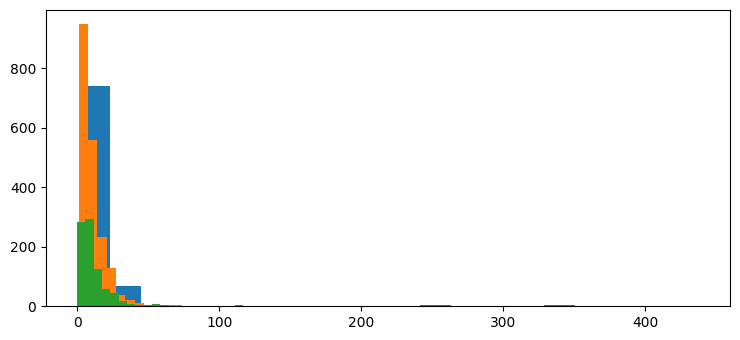

In [534]:
plt.hist(speakers[speakers.gender_speaker=='NGS'].spoken_word_count, bins=20)
plt.hist(speakers[speakers.gender_speaker=='M'].spoken_word_count, bins=20)

plt.hist(speakers[speakers.gender_speaker=='F'].spoken_word_count, bins=20)


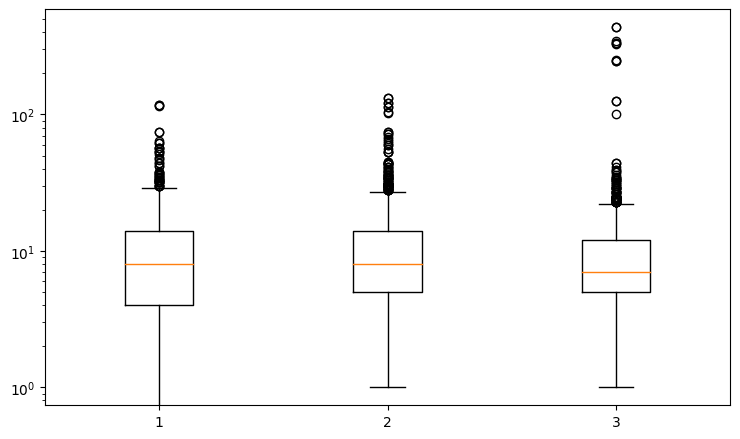

In [577]:
plt.boxplot(
    [
        speakers[speakers.gender_speaker=='F'].spoken_word_count,
        speakers[speakers.gender_speaker=='M'].spoken_word_count,
        speakers[speakers.gender_speaker=='NGS'].spoken_word_count
    ]
);
plt.yscale('log')

In [593]:
# gr = speakers.groupby(['book', 'name_speaker', 'gender_speaker']).sum()
# gr

In [594]:
# plt.boxplot(
#     [
#         gr.loc[:,:,'F'].spoken_word_count,
#         gr.loc[:,:,'M'].spoken_word_count,
#         gr.loc[:,:,'NGS'].spoken_word_count,
#     ]
# );
# plt.yscale('log')
# plt.xticks(['F', 'M', 'NGS'])

In [552]:
summary_character

,gender,total characters,proportions,human characters,human proportions,nonhuman characters,nonhuman proportions,protagonists,protagonist proportions,secondaries,secondary proportions,human protagonists,human protagonist proportions,nonhuman protagonists,nonhuman protagonist proportions,human secondaries,human secondary proportions,nonhuman secondaries,nonhuman secondary proportions
0,F,330,0.225873,197,0.411273,123,0.135165,44,0.212560,286,0.22807,23,0.294872,18,0.183673,174,0.433915,105,0.129310
1,M,530,0.362765,223,0.465553,271,0.297802,142,0.685990,388,0.30941,47,0.602564,71,0.724490,176,0.438903,200,0.246305
2,NGS,601,0.411362,59,0.123173,516,0.567033,21,0.101449,580,0.46252,8,0.102564,9,0.091837,51,0.127182,507,0.624384


In [553]:
# summary_character.append(0, axis=1)
summary_character.loc[len(summary_character)] = 0

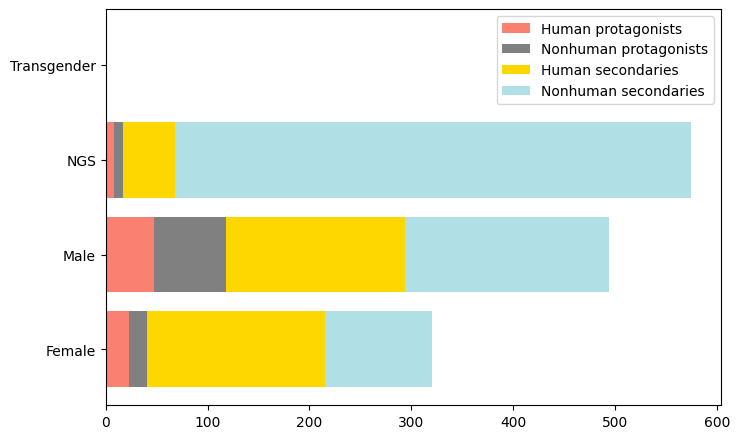

In [572]:
plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True

gender = ['Female', 'Male', 'NGS', 'Transgender']
human_protagonists = summary_character['human protagonists']
nonhuman_protagonists = summary_character['nonhuman protagonists']
human_secondaries = summary_character['human secondaries']
nonhuman_secondaries = summary_character['nonhuman secondaries']


b1 = plt.barh(gender, human_protagonists, color="salmon")
b2 = plt.barh(gender, nonhuman_protagonists, left=human_protagonists, color="grey")
b3 = plt.barh(gender, human_secondaries, left=human_protagonists + nonhuman_protagonists, color="gold")
b4 = plt.barh(gender, nonhuman_secondaries, left=human_protagonists + nonhuman_protagonists + human_secondaries, color="powderblue")


plt.legend([b1, b2, b3, b4], ["Human protagonists", "Nonhuman protagonists", "Human secondaries", "Nonhuman secondaries", ])#, title="Characters")#, loc="upper right")
plt.tight_layout()
plt.show()

In [428]:
speakers[speakers.speaker_is_mum].spoken_word_count.sum() / speakers[speakers.gender_speaker=='F'].spoken_word_count.sum()

0.09888958726168029

In [429]:
speakers[speakers.speaker_is_dad].spoken_word_count.sum() / speakers[speakers.gender_speaker=='M'].spoken_word_count.sum()

0.0200529701097238